CS530 Group Project 


Hesam Sadri, Celeste Manughian-Peter, Hanna Lu


May 23, 2020



# <h1><center>Netflix Movie Recommendation System</center></h1>

# Introduction

### 1. Recommendation System

A recommendation system, also known as a recommender system, is a subclass of information filtering system taht seeks to predict the rating or preference a user would give to an itme. Main techniques for solving Recommendation systems problems include collaborative filtering, content-based filtering, knowledge-based systems, and hybrid systems (which uses a combination of the collaborative filtering and content-based filtering). 

The most popular and easiest is collaborative filtering. It builds a model from a user's past behavior (items previously purchased or selected and/or numerical ratings given to those items) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that the user may have an interest in. Simply put, it uses past ratings to predict future ratings.

Content-based filtering approaches utilize a series of discrete, pre-tagged characteristics of an item in order to recommend additional items with similar properties. For example, recommend movies to cutomers based on the genre or actors of the movies that the customers watched in the past. 

Recommendation systems are primarily used in commercial applications, and are most commonly recognized as playlist generators for video and music services such as Netflix, Spotify, and YouTube, product recommendations for services such as Amazon, or content recommendations for social media platforms such as Facebook and Twitter. Other popular applicatins of recommendation systems include areas such as restaurant recommendations such as Yelp and online dating such as Match.com. Current recommendation systems typically combine one or more approaches into a hybrid system.

Given observations (ratings) of a user’s past behavior, the aim is to predict which other things that same user will like (movies) using serveral algorithms to create a recommendation system. Most internet products we use today are powered by recommendation systems. Commercial applications such as Youtube, Netflix, Spotify rely on recommendation systems to generate playlist for their customers. Social media platforms such as Facebook and Twitter rely on recommendation systems to recommend content for their customers. Commercial websites such as Amazon and Pinterest rely on recommendation systems to recommend product or services. Other commercial applications that utilize recommendation systems include Yelp, Match.com, and more.


### 2. Collaborative Filtering

Generally speaking, collaborative filtering is the process of filtering for information or patterns using techniques involving collaboration among multiple agents, viewpoints, data sources, etc. It is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating). [Wikipedia]

There are two forms of collaborative Filtering, item-based and user-based collaborative filtering. The main idea behind the user-based collaborative filtering is that people with similar characteristics share similar taste. Item-based collaborative filtering, as suggested by its name, is based on the similarity between items calculated using people's ratings of those items. 

The picture below shows the differnce of the two forms of collaborative filtering.
<img src="./files/rec_system">

### 3. Similarity Calcuation

Both user-based and item-based collaborative filtering techniques utilizes the similarity between users or items. There are different ways to calcuate the simmilarities. Below are some most commonly used methods.

#### 3.1 Cosine Similarity
<img src="./files/cosine.png">

Where u,v indicate users u and v, i,j indicate items i and j, and r indicates ratings. Therefore, the first similarity is for user-based similarity, and the second is the item-based the similarity.

#### 3.2 Mean Squared Distance (MSD) Similarity
<img src="./files/msd.png">

#### 3.2 Pearson Similarity
<img src="./files/pearson.png">

# The Problem 

Netflix held the Netflix Prize open competition for the best algorithm to predict user ratings for films. The grand prize was $1,000,000 and was won by BellKor's Pragmatic Chaos team. This is the dataset that was used in that competition.  

We aimed to build a movie recommendation mechanism with movie ratings from Netflix users. The dataset comes directly from Netflix, and is available on Kaggle. This is a typical recommendation system problem, and the appropriate technique for this porblem is collaborative filtering since we only have the ratings information available.

### 1. Dataset Overview 

The data consists of four text data files, each file containing over 20 million rows (over 4K movies and 400K customers). All together, over 17K movies and 500K+ customers! 
From Kaggle.com we obtained 17,770 movies, and 480,189 customers. Each customer rates multiple movies. There were 5 datasets: 

* Movie Title dataset (17,770 rows, 3 features: Movie ID, Year of Release, Title)
* 4 Ratings datasets (over 100 million rows with 3 features: Customer ID, Rating, Date)

We used subsets of the data due to memory limitations:
* 400 movie subset (over 2 million rows)
* 700 movie subset (over 3.5  million rows)
* 1000 movie subset (over 5 million rows)


### 2. Training Dataset Description 

The file "training_set.tar" is a tar of a directory containing 17770 files, one
per movie. The first line of each file contains the movie ID, followed by a
colon. Each subsequent line in the file corresponds to a rating from a customer
and its date in the following format:

CustomerID, Rating, Date

    MovieIDs range from 1 to 17770 sequentially.
    CustomerIDs range from 1 to 2649429, with gaps. There are 480189 users.
    Ratings are on a five star (integral) scale from 1 to 5.
    Dates have the format YYYY-MM-DD.
    


### 3. Movies File Description 

Movie information in "movie_titles.txt" is in the following format:

MovieID, YearOfRelease, Title

    MovieID do not correspond to actual Netflix movie ids or IMDB movie ids.
    YearOfRelease can range from 1890 to 2005 and may correspond to the release of
    corresponding DVD, not necessarily its theaterical release.
    Title is the Netflix movie title and may not correspond to
    titles used on other sites. Titles are in English.
    QUALIFYING AND PREDICTION DATASET FILE DESCRIPTION:

The qualifying dataset for the Netflix Prize is contained in the text file "qualifying.txt". It consists of lines indicating a movie id, followed by a colon, and then customer ids and rating dates, one per line for that movie id. The movie and customer ids are contained in the training set. Of course the
ratings are withheld. There are no empty lines in the file. It is presented in the following format:

    MovieID1:
    CustomerID11,Date11
    CustomerID12,Date12
    
    …
    
    MovieID2:
    CustomerID21,Date21
    CustomerID22,Date22

For the Netflix Prize, the algorithm must predict the all ratings the customers gave the movies in the qualifying dataset based on the information in the training dataset.
tc.

The dataset and other information about the problem can be seen here: https://www.kaggle.com/netflix-inc/netflix-prize-data

# Data Preprocessing and Visualization

### Loading the data

In [9]:
import random
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.sparse import csr_matrix # pivot ratings into movie features
from scipy import sparse

from sklearn.metrics.pairwise import cosine_similarity
import sklearn.preprocessing as pp
from sklearn.metrics.pairwise import cosine_similarity


from surprise import Reader, Dataset,SlopeOne, SVD ,accuracy,Trainset,KNNWithMeans,KNNBasic,BaselineOnly,CoClustering,SVDpp,NMF,KNNBaseline
from surprise.model_selection import train_test_split,cross_validate,GridSearchCV
from surprise import accuracy
from surprise import Reader, Dataset, SVD # pip install scikit-surprise

movies = pd.read_csv('movie_titles.csv', 
                     header = None, 
                     usecols = [0,1,2], 
                     names = ['MovieID', 'YearOfRelease', 'Title'],
                     encoding='latin1')

df = pd.read_csv('combined_data_1.txt', 
                  names = ['Cust_Id', 'Rating'], 
                  usecols = [0,1])

### Pre-processing the data

The data set from Kaggle is clean with no missing values and no outliers, so not much preprocessing needed to be done. 

Reformatting the ratings data was necessary. Ratings are stored in 4 datasets, which needed to be combined. The Movie ID in the ratings dataset were mixed in the rows. We extracted the Movie ID and assigned them to rows in the ratings dataset using a pivot operation. 

Reformatting the dataframe into a sparse matrix was also necessary for the manual implementation of KNN. 

In [232]:
# Preprocess datasets here
nan = pd.DataFrame(pd.isnull(df['Rating']))
movie_id = df[nan['Rating'] == True]['Cust_Id']

# Take 400 movies
df_400 = df.iloc[:2112852,]
m_id = movie_id.iloc[:401,]

# Use the index of the movies to generate Movie IDs corresponding to the rows (cutomer IDs)
Movie_ID = []
for i in range(1,401):
    Movie_ID.append((m_id.index[i]-m_id.index[i-1])*[i])
MovieID = sum(Movie_ID, [])

# Assign the Movie IDs to the rows
df_400['MovieID'] = MovieID

# Delete the rows with the original Movie IDs
df_400_1 = df_400.dropna()

NameError: name 'df' is not defined

In [113]:
print(df_400_1.isnull().sum()) # Check for missing values
print(df_400_1.shape) # Check for number of rows in the subset
display(df_400_1.head())

Cust_Id    0
Rating     0
MovieID    0
dtype: int64
(2112452, 3)


,Cust_Id,Rating,MovieID
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [114]:
# Free up some memory
# del nan
# del df_100
# del df_400

### Exploratory Data Analysis

To check for outliers and gauge the overall characteristics of our data subsets, we developed a few plots. The first plot shows the distribution of movie ratings in one of the data subsets using 400 movies. This distribution is mirrored in larger subsets of dataset.


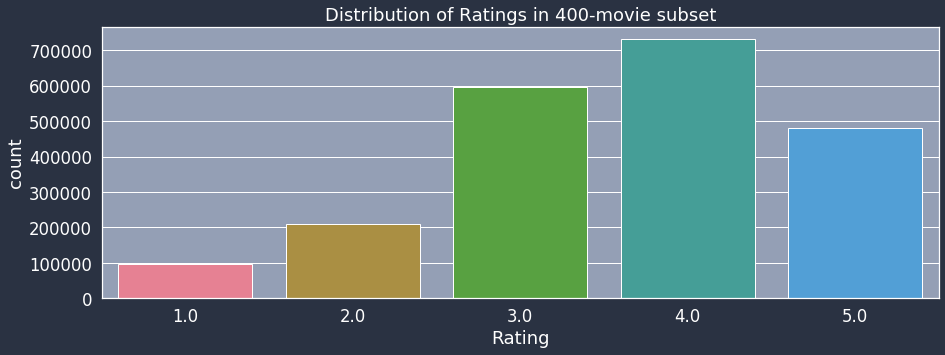

In [116]:
plt.figure(figsize=(15,5))
sns.set(rc={'text.color':"white", 
            'axes.labelcolor': 'white', 
            'xtick.color': 'white', 
            'ytick.color': 'white', 
            'axes.facecolor': '#949fb5',
            'figure.facecolor': '#2a3242'}, 
        font_scale=1.5, palette='husl')
sns.countplot(df_400_1.Rating)
_ = plt.title("Distribution of Ratings in 400-movie subset")

The next plot shows the distribution of total ratings per movie vs average rating for movie. We expect the majority of movies to have a few thousand ratings and the rest are much less known with little or no user-interactions. We can see that each movie have between e^4-e^12 ratings from customers (54 - 164,000) and most movies have an average rating around 3.6 with a standard deviation 1.1.

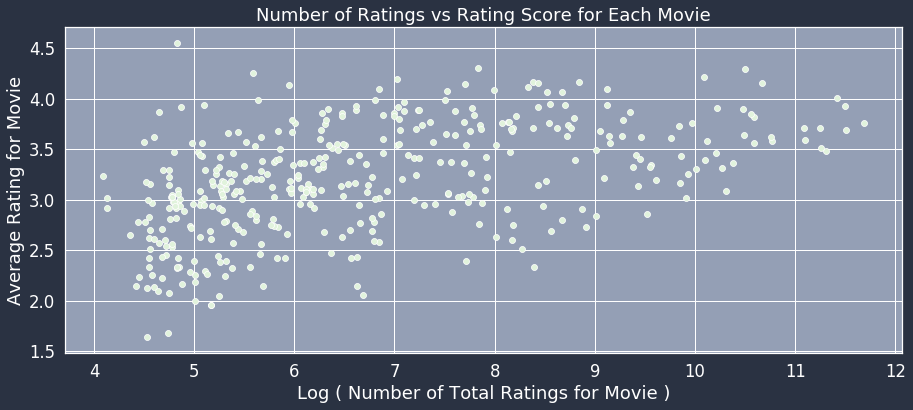

In [117]:
import seaborn as sns
sns.set(rc={'text.color':"white", 
            'axes.labelcolor': 'white', 
            'xtick.color': 'white', 
            'ytick.color': 'white', 
            'axes.facecolor': '#949fb5',
            'figure.facecolor': '#2a3242'}, 
        font_scale=1.5, palette='Greens')
count_rating = df_400_1.groupby(['MovieID'])['Rating'].agg(['count','mean'])
plt.figure(figsize=(15,6))
sns.scatterplot(np.log(count_rating['count']), count_rating['mean'])
plt.xlabel('Log ( Number of Total Ratings for Movie )')
plt.ylabel('Average Rating for Movie')
plt.title('Number of Ratings vs Rating Score for Each Movie')
plt.show()

# Model Construction

For this project, we went through a few different algorithms to analyze the effectiveness of each: 
* SVD (Singular Value Decomposition)
* SVD++ (SVD Plus Plus)
* NMF (Non-negative Matrix Factorization)
* BaselineOnly
* SlopeOne
* KNNBasic
* KNNBaseline
* KNNWithMeans

We ran these with several varying size subsets, 400, 700 and 1000 movies. We only include the 400-movie subset in this notebook and a link to the other notebooks with more detailed runs, since those take a long time to run. 

### Collaborative filtering 

Each of these algorithms are collaborative filtering techniques. We chose collaborative filtering because it is one step beyond what we learned in class, and can be implemented in combinations with algorithms we learned to create a recommendation system. Collaborative filtering is based on the assumption that people who agreed in the past will agree in the future, and that they will like similar kinds of items as they liked in the past. When we want to recommend something to a user, the most logical thing to do is to find people with similar interests, analyze their behavior, and recommend our user the same items (user based) or we can look at the items similar to ones which the user bought earlier, and recommend products which are like them (item based). In both cases this recommendation engine has two steps: 

1. Find out how many users/items in the database are similar to the given user/item.
2. Assess other users/items to predict what grade you would give the user of this product, given the total weight of the users/items that are more similar to this one

This kind of recommendation system can be implemented with each of these algorithms. For our model construction, we mostly used the scikit surprise package, with the exception of the handwritten KNN collaborative filtering algorithm implementation. Surprise stands for Simple Python RecommendatIon Systems Engine. We also used gridsearch to tune all of the algorithms hyperparameters (3 data subset sizes * 9 algorithms). 

In the end, we eneded up fitting 81 models (3 sizes * 3 slices * 9 algorithms), and RMSE was used to evaluate the models. 


#### SVD 

SVD stands for singular value decomoposition. This is a matrix factorization algorithm, where the main assumption is that there exists a pretty low dimensional latent space of features in which we can represent both users and items. The interaction between a user and an item can be obtained by computing the dot product of corresponding dense vectors in that space. We don’t want to give explicitly these features to our model, so this lets the system discover these useful features by itself and make its own representations of both users and items.

As they are learned and not given, extracted features taken individually have a mathematical meaning but no intuitive interpretation (and, so, are difficult, if not impossible, to understand as human). However, it is not unusual to end up having structures that are extremely close to an intuitive decomposition that a human interpret. The consequence of factorisation is that users that are similar in terms of preferences and characteristics have close representations in the latent space. 

#### SVD++

SVD++ is an improvement to the SVD algorithm, which had the best performance in the Netflix competition. Modern day recommender systems should exploit all available interactions: both explicit (e.g. numerical ratings) and implicit (e.g. likes, purchases, skipped, bookmarked). To this end, SVD++ was designed to take into account implicit interactions as well.

In our case, an implicit rating describes the fact that user u rated a movie i, regardless of the rating value. In other words, the information of whether or not a user rated a movie is also taken into account in the SVD++ model. 

#### NMF 

NMF is another collaborative filtering algorithm based on Non-negative Matrix Factorization. This algorithm is very similar to SVD. We use the surprise package to run their implementation of it with our data. SVD results are more deterministic compared to that of NMF. SVD is a more 'insightful' factorization technique. NMF gives only U and V matrices, but SVD gives a Sigma matrix also along with these two. Sigma gives us insights into the amount of information each eigen vector holds. 

 
#### Slope One

Slope One is actually a group of algorithms used for collaborative filtering. It was published in a 2005 paper by Daniel Lemire and Anna Maclachlan. It's the simplest form of non-trivial item-based collaborative filtering based on ratings. This algorithm's simplicity makes it very easy to implement efficiently while it's accuracy is often on par with more complicated and computationally-expensive algorithms. They have also been used as building blocks to improve other algorithms. 

It uses a simple form of linear regression to predict ratings. 


#### CoClustering

With this algorithm, users and items are assigned some clusters Cu, Ci, and some co-clusters C_ui. This algorithm is beneficial because it is less computationally expensive than SVD. With this algorithm, it is possible to obtain an accuracy comparable to that of the correlation and matrix factorization based approaches at a much lower computational cost.


#### KNN

For a recommendation system, KNN can be used with collaborative filtering. This works by computing the similarity between all users with a specific distance metric. In our case, we used the cosine similarity to compute the user similarity matrix. With this matrix, an equation, shown in our implementaiton below, can be used to compute the estimated rating for movie i given the K nearest users to a user, along with their ratings. 

### GridSearch

We use gridsearch on a subset of the data to find the optimal hyperparameters, and run the algorithm(s) with those hyperparameters on bigger data sets, since gridsearch was too memory intensive to run on those bigger data sets. 

### KNN with Collaborative Filtering By Hand

Initially we tried KNN with collaborative filtering by hand, in hopes to optimize the memory usage with a sparse matrix. Then we moved on to use the KNNBaseline algorithm, which is the same as the by hand implementation, since this turns out to be faster. 

In [123]:
df_100_noNA = df_400_1.iloc[:352871,] # Just take the first 100 movies since it can't handle too many
df_100_noNA.Rating = df_100_noNA.Rating.astype('int32')
df_100_noNA.Cust_Id = df_100_noNA.Cust_Id.astype('int32')
df_100_noNA.reset_index(inplace=True, drop=True)

fourth = 125235
df_movie_features = df_100_noNA[:fourth].pivot(
                index='MovieID',
                columns='Cust_Id',
                values='Rating').fillna(0)
df_movie_features.index = df_movie_features.index.map(movies.Title) # Map the movie ID to movie Title 

df_fts = df_movie_features.transpose() 
df_fts = df_fts[:12523]
df_sparse = sparse.csr_matrix(df_fts.transpose())

display(df_fts.head())

/home/celeste/.local/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


MovieID,Isle of Man TT 2004 Review,Character,Paula Abdul's Get Up & Dance,The Rise and Fall of ECW,Sick,8 Man,What the #$*! Do We Know!?,Class of Nuke 'Em High 2,Fighter,Full Frame: Documentary Shorts,...,Chump Change,Clifford: Clifford Saves the Day! / Clifford's Fluffiest Friend Cleo,My Bloody Valentine,Inspector Morse 31: Death Is Now My Neighbour,Never Die Alone,Sesame Street: Elmo's World: The Street We Live On,Lilo and Stitch,Boycott,Something's Gotta Give,Classic Albums: Meat Loaf: Bat Out of Hell
Cust_Id,,,,,,,,,,,,,,,,,,,,,
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [ ]:
# # Free up some memory for the cosine similarity computation 
# del mat_movie_features
del df_100
del movie_id
del df
del movies
del df_100_noNA

In [132]:
# Use cosine similarity to measure the similarity between users
def cosine_similarities(mat):
    col_normed_mat = pp.normalize(mat.tocsc(), axis=0)  # scipy.sparse.csc_matrix
    return col_normed_mat.T * col_normed_mat

customer_similarities = cosine_similarities(df_sparse)
customer_similarities= customer_similarities.toarray()

In [133]:
user_similarity_matrix = pd.DataFrame(customer_similarities)
user_similarity_matrix.columns = df_fts[:12523].index.values  # Customer IDs 
user_similarity_matrix.index = user_similarity_matrix.columns
print("Customer similarities for customer ID's from first 100 movies shown:")
display(user_similarity_matrix.head())
# set the column and index to customer ID
# Get the top K customer scores for each row 
# Rank function

Customer similarities for customer ID's from first 100 movies shown:


,7,42,59,134,199,201,261,265,307,383,...,336784,336789,336807,336821,336829,336842,336847,336882,336895,336940
7,1.000000,0.0,0.0,0.624695,0.0,0.624695,0.0,0.624695,0.780869,0.624695,...,0.624695,0.374817,0.624695,0.0,0.0,0.0,0.487805,0.0,0.624695,0.441726
42,0.000000,1.0,1.0,0.000000,1.0,0.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.707107
59,0.000000,1.0,1.0,0.000000,1.0,0.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.707107
134,0.624695,0.0,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.000000,1.000000,...,1.000000,0.600000,1.000000,0.0,0.0,0.0,0.780869,0.0,1.000000,0.707107
199,0.000000,1.0,1.0,0.000000,1.0,0.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.707107


### Predict Score Calculation

##### Implement custom ranking function

The equation below is used to get the rating r for user u on movie i. 

<img src="files/ranking_function.png">

Where r is the rating, k is the number of neigbors predifined in our model, sim() is the similarity between two users, i is movie i.

In [134]:
def rank_user_movie(user_row, movie_id, df):
    user_similarities_top_k = user_row.nlargest(K)  # Most similar customers to customer in user_row 
    nearest_neighbors_cust_ID = user_similarities_top_k.index.values

    r_u = df.loc[user_id]  #  ranking from the user u - user user_id's row from df across all movies
    r_u_bar = np.mean(r_u.where(r_u>0)) # average nonzero rankings in all user's rankings, r_u

    k = 1/np.sum(user_similarities_top_k)
    # For each most nearest user u', zum the similarity between that user and our user u, times the 
    # rank for nearest user u' for that specific movie - the average ranking for all movies for nearest user u'
    sum3=[]
    for u_prime, sim_u_uprime in zip(nearest_neighbors_cust_ID, user_similarities_top_k):
        r_u_prime_i=df.loc[u_prime][movie_id]
        r_u_prime = df.loc[u_prime]
        r_u_prime_bar= np.mean(r_u_prime.where(r_u_prime>0))
        sum3.append(sim_u_uprime*(r_u_prime_i - r_u_prime_bar))

    r_u_i = r_u_bar + k*np.sum(sum3)
    return r_u_i 

In [143]:
K=20
movie_id = "Lilo and Stitch"
user_id = 336847
df = df_fts
user_row = user_similarity_matrix.loc[user_id]  # Customer user_id's similarities to all other customers 

In [145]:
# # Predict the rating for user 336847 on movie 8, titled "Class of Nuke 'Em High 2": 
rank_user_movie(user_row=user_row, movie_id="Class of Nuke 'Em High 2",df=df)

0.7951235964187946

Using the by-hand KNN Collaborative filtering implementation with datasets larger than the one used here resulted in out-of-memory errors. Down below we will show what the implementation looks like for larger data set sizes. This gives us a good idea of how the algorithm is working. 

### Algorithms From the Surprise Package

In addition to doing the KNN by hand, we moved on to use the Surprise package to implement KNN and our other algorithms. 

Surprise is a Python scikit building and analyzing recommendation systems that deal with explicit rating data. The name SurPRISE stands for Simple Python RecommendatIon System Engine. It does not support content based filtering.

We will define a function to make predictions and obtain the RMSE for each model:

In [43]:
def fit_predict(algo, train, test):
    model = algo.fit(train)
    prediction = model.test(test)
    return(accuracy.rmse(prediction))

Next, we loop through all the subsets of data and calculate the RMSE for each of the mentioned algorithms. We choose to use user-based form of collaborative filtering. Here we use the optimal hyperparameters obtained through using GridSearch (shown in the <font color="grey">"Netflix Movie Recommender GridSearch.ipynb notebook"</font>). This was very time-consuming to run both gridsearch and for larger subsets; for this report we keep it to the minimal 400-movie subset and refernece the work done to run the larger subsets.  

In [46]:
reader = Reader(rating_scale=(1, 5))
df_all = [df_400_1] #, df_400_2, df_400_3]
rmse = []

for data in df_all:
    d = Dataset.load_from_df(data[['Cust_Id', 'MovieID', 'Rating']], reader)
    train, test = train_test_split(d, test_size = 0.3)
    
    # SVD:
    print("SVD:")
    svd = SVD(n_factors = 20, lr_all = 0.005, reg_all = 0.01)
    rmse.append(fit_predict(svd, train, test))
    
    # NMF:
    print("NMF:")
    nmf = NMF(n_factors = 20, n_epochs = 20, biased = True)
    rmse.append(fit_predict(nmf, train, test))
    
    # SlopeOne:
    print("SlopeOne:")
    slope = SlopeOne()
    rmse.append(fit_predict(slope, train, test))
    
    # CoClustering:
    print("CoClustering:")
    cc = CoClustering(n_cltr_u = 2, n_cltr_i = 2)
    rmse.append(fit_predict(cc, train, test))
    
    # BaselineOnly
    print("BaselineOnly:")
    bsl_options = {'method': 'sgd','learning_rate': .00005}
    bsl = BaselineOnly(bsl_options = bsl_options)
    rmse.append(fit_predict(bsl, train, test))
    
    # SVD++
    print("SVD++:")
    svdpp = SVDpp(n_factors = 50, lr_all = 0.005, reg_all = 0.02)
    rmse.append(fit_predict(svdpp, train, test))

    # KNNBasic
    print("KNNBasic:")
    sim_options = {'name': 'MSD', 'user_based': False}
    knn_basic = KNNBasic(k=20, sim_options = sim_options, min_k = 5)
    rmse.append(fit_predict(knn_basic, train, test))
    
    # KNNWithMeans
    print("KNNWithMeans:")
    sim_options = {'name': 'MSD', 'user_based': False, 'shrinkage': 10}
    knn = KNNWithMeans(k=20, sim_options = sim_options, min_k = 8)
    rmse.append(fit_predict(knn, train, test))
    
    # KNNBaseline
    print("KNNBaseline")
    sim_options = {'name': 'MSD', 'user_based': False, 'shrinkage': 10}
    knn_bsl = KNNBaseline(k=20, sim_options = sim_options, min_k = 8)
    rmse.append(fit_predict(knn_bsl, train, test))

SVD:
RMSE: 1.0148
NMF:
RMSE: 1.0202
SlopeOne
RMSE: 1.0349
CoClustering:
RMSE: 1.0664
BaselineOnly:
Estimating biases using sgd...
RMSE: 1.0276
SVD++:
RMSE: 0.9780
KNNBasic:
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0426
KNNWithMeans:
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9947
KNNBaseline
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9802


### Plot of RMSE vs Sample Size by Algorithm

The results for the algorithms shown above are promising. We see that SVD++ is the highest performing algorithm, closely followed by KNNBaseline. Due to the fact that we are not using the whole dataset, to reduce the potential bias caused by a particular samll subset, we sampled 9 subsets, i.e. 3 subsets for each size of 400, 700, and 1000 movies. There are over 2 million rows in each subset of the 400 movie subsets, over 3.5 million rows in each subset of the 700 movie subsets, and over 5 million rows in the 1000 movie subset.

<img src="./files/rmse_sample_slices.png">
<font color="grey">Values calculated in "Netflix Movie Recommendation Slices.ipynb"</font>

We can see that the RMSE is going downward as the sample size increases for almost all of the algorithms. This is expected: as we obtain more data, the predictions should be more accurate. This also shows that this downward trend is consistent for all slices and across all sample sizes.

Since the memory load on our computers was too large to handle, we can make a regression line to fit to the RMSE data to get an idea of what our accuracy would have been with a larger data set. This assumes it would be following the same trend as our RMSE has shown for the three 400, 700, 1000-movie subsets. However three RMSE datapoints (400 movies, 700 movies, 1000 movies) are too small of a sample size to make a reliable prediction of the accuracy for a dataset that is over 17 times bigger than the biggist dataset we used. To increase the sample size for the regression, we need to have a few more datasets. To make the prediction more reliable, we need to use larger datasets (3000 movies, 5000 movies, and 7000 movies). Due to the fact that the best algorithm SVD++ takes much longer than other algorithms, KNNBaseline (second best) and KNNBasic (third best) are also slow, SVD (equivalent to KNNBasic in terms of RMSE) runs much faster. Therefore, we choose to use SVD to fit the larger datasets.

The following table from the Surprise website also confirms the running time for each algorithm on a dataset with 1 million ratings. The dataset is much smaller than ours, but we can get an idea of the running time of each algorithm.

<img src="./files/RunningTime.png">

### Estimate RMSE for the Whole Dataset

In [5]:
# Load the RMSEs of the SVD model on datasets of all sizes
# For sizes 400, 700, 1000 movies, we used the average of the RMSE on all three slices of each sample size
rmse = pd.read_excel("RMSE2.xlsx")

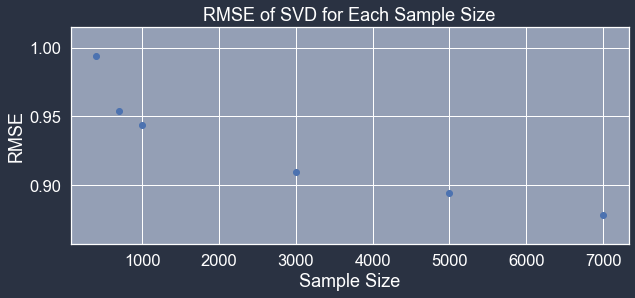

In [11]:
# Plot the original RMSEs
plt.figure(figsize=(10,4))

sns.set(rc={'text.color':"white", 
            'axes.labelcolor': 'white', 
            'xtick.color': 'white', 
            'ytick.color': 'white', 
            'axes.facecolor': '#949fb5',
            'figure.facecolor': '#2a3242'}, 
        font_scale=1.5)

plt.scatter(rmse['Sample Size'], rmse['SVD'])
plt.title("RMSE of SVD for Each Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("RMSE")
plt.show()

The plot shows that the RMSE points do not follow a straight line across the logged sample size. We can fit a simple regression line to make prediction on the RMSE for the sample size 17770.

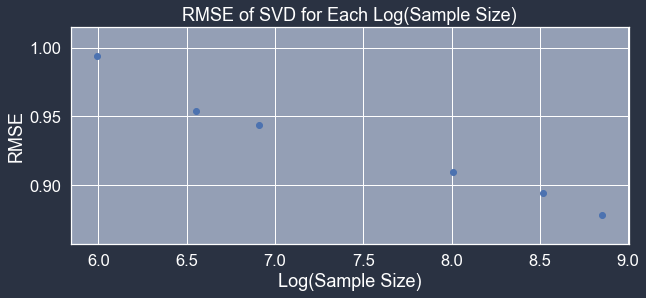

In [13]:
# Plot the RMSEs for logged sample sizes
log_size = [np.log(x) for x in rmse['Sample Size']] # Take the log of the sample sizes

plt.figure(figsize=(10,4))

sns.set(rc={'text.color':"white", 
            'axes.labelcolor': 'white', 
            'xtick.color': 'white', 
            'ytick.color': 'white', 
            'axes.facecolor': '#949fb5',
            'figure.facecolor': '#2a3242'}, 
        font_scale=1.5)

plt.scatter(log_size, rmse['SVD'])
plt.title("RMSE of SVD for Each Log(Sample Size)")
plt.xlabel("Log(Sample Size)")
plt.ylabel("RMSE")
plt.show()

Now the RMSE points seem to follow a straight line. So, we can fit a simple regression with the RMSEs as the dependent variable (or the target variable), and the logged sample sizes as the independent variable (or the preditor variable).

In [72]:
from sklearn.linear_model import LinearRegression

# Fit the model:
x = np.array(log_size).reshape(-1, 1)
y = np.array(rmse['SVD']).reshape(-1, 1)
lr = LinearRegression()

lr.fit(x, y)
r2 = lr.score(x,y)
print('R2 =', round(r2,4))

R2 = 0.9732


In [217]:
# Make predictions
larger_sizes = [9000, 11000, 13000, 15000, 17000, 17770]
sizes = np.array(smaller_sizes + larger_sizes)
logged = [np.log(x) for x in sizes]
all_sizes = np.array(logged).reshape(-1, 1)
fitted_pred = lr.predict(all_sizes)

In [219]:
# Combine original RMSEs and Predicted RMSEs
sizes_2 = [x for x in sizes]
prdictions = [x for x in fitted_pred]
rmse_larger = pd.DataFrame({'Sample Size': sizes_2, 'SVD': predictions})
rmse_all = rmse_larger.merge(rmse, on='Sample Size',how='left')

In [221]:
rmse_all

,Sample Size,SVD_x,SVD_y
0,400,0.983418,0.994167
1,700,0.962818,0.954000
2,1000,0.949688,0.943500
3,3000,0.909246,0.909500
4,5000,0.890441,0.894500
5,7000,0.878055,0.878000
6,9000,0.868804,NaN
7,11000,0.861417,NaN
8,13000,0.855267,NaN
9,15000,0.849999,NaN


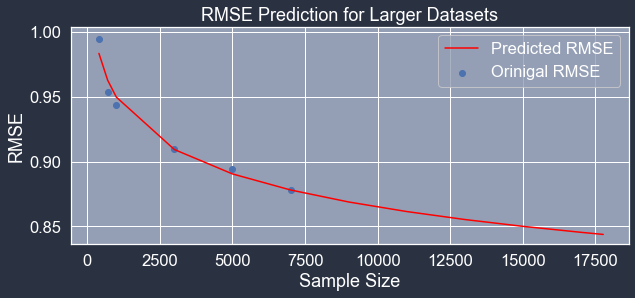

In [222]:
# Plot the original RMSEs and the predicted RMSEs

plt.figure(figsize=(10,4))

sns.set(rc={'text.color':"white", 
            'axes.labelcolor': 'white', 
            'xtick.color': 'white', 
            'ytick.color': 'white', 
            'axes.facecolor': '#949fb5',
            'figure.facecolor': '#2a3242'}, 
        font_scale=1.5)


plt.plot(rmse_all['Sample Size'], rmse_all['SVD_x'], color = 'red', label = 'Predicted RMSE')
plt.scatter(rmse_all['Sample Size'], rmse_all['SVD_y'], label = 'Orinigal RMSE')
plt.title("RMSE Prediction for Larger Datasets")
plt.xlabel("Sample Size")
plt.ylabel("RMSE")
plt.legend()
plt.show()

The R squared of the regression model we used to predict the RMSE for the full dataset is 0.9732, which is pretty good. Based on our predcition, the RMSE of the fitting the SVD model on the full dataset would be 0.8438. The RMSE of the $1M winning team is 0.8567. We understand that due to the time and memory limit, we only fitted the model on 6 datasets which is still too small a sample size and therefore, the predition may not be accurate. However, it gives us an idea that with the full dataset, we can get much closer to the RMSE of the winning team. 

We are now confident with our models and ready to predict ratings and make recommendations.

### Testing the models: Predictions and Recommendations

For our algorithms, we saw that the larger the sample size, the smaller the RMSE. We expect we could've obtained the RMSE that the winning Netflix prize team obtained if we had more RAM to run our algorithms with. 
Our best-performing models were SVD++ and KNNBaseline, with an RMSE of 0.9207.


In [94]:
# Build the model with the best algorithm (SVD++)
d = Dataset.load_from_df(df_400_1[['Cust_Id', 'MovieID', 'Rating']], reader)
train, test = train_test_split(d, test_size = 0.3)
svdpp = SVDpp(n_factors = 50, lr_all = 0.005, reg_all = 0.02)
svdpp = svdpp.fit(train)

In [95]:
def pred_movie_merge(prediction):
    global movies
    Cust_Id, MovieID, Rating, Predicted_Rating = [], [], [], []
    
    # Convert the predictions to a dataframe:
    for i in range(len(prediction)):
        Cust_Id.append(prediction[i][0])
        MovieID.append(prediction[i][1])
        Predicted_Rating.append(prediction[i][3])
    df = pd.DataFrame({'Cust_Id':Cust_Id,'MovieID':MovieID,'Predicted_Rating':Predicted_Rating}) 
    
    # Merge the predictions and movies datasets to get the Movie Title and Year of Release columns:
    df['MovieID'] = df['MovieID'].astype(str)
    movies['MovieID'] = movies['MovieID'].astype(str)
    pred_movie = pd.merge(df, movies, how = 'left', on = 'MovieID')
    
    return(pred_movie)

In [96]:
def recommend(dataset, model, customerID, top=5):
    m_ids = dataset['MovieID'].unique() # Find unique movie IDs
    rated = dataset.loc[dataset['Cust_Id']==str(customerID),'MovieID'] # Find the movies the customer rated
    m_to_pred = np.setdiff1d(m_ids, rated) # Remove the movies the customer rated
    test_set = [[str(customerID), m, 4.] for m in m_to_pred] # Make a list of the movies to be rated
    prediction = model.test(test_set) # Predict ratings on the movies to be rated   
    pred_movie = pred_movie_merge(prediction) # Get the Title and YearOfRelease columns from the movies dataset
    ratings = pred_movie[pred_movie['Cust_Id']==str(customerID)] # Get the predicted ratings for the specified customerID
    recommendations = ratings.sort_values(['Predicted_Rating'], ascending=0)[['Title','YearOfRelease','Predicted_Rating']][:top]
    print(top,'Movie Recommendations for Customer ' + str(customerID) + ':')
    return(recommendations)

In [97]:
# Recommend 5 movies for customer 1544402
top = 5
recommend(df_400_1, svdpp, 1488844, top)

5 Movie Recommendations for Customer 1488844:


,Title,YearOfRelease,Predicted_Rating
10,Lord of the Rings: The Return of the King: Ext...,2003.0,4.419176
95,Stevie Ray Vaughan and Double Trouble: Live at...,2004.0,4.144558
119,Viva La Bam: Season 1,2003.0,4.094557
74,Elfen Lied,2005.0,4.082984
199,Chappelle's Show: Season 1,2003.0,4.073824


In [98]:
# Recommend 7 movies for customer 885013:
top = 7
recommend(df_400_1, svdpp, 885013, top = 5)

5 Movie Recommendations for Customer 885013:


,Title,YearOfRelease,Predicted_Rating
30,Aqua Teen Hunger Force: Vol. 1,2000.0,5.000000
171,Reservoir Dogs,1992.0,4.923615
65,Invader Zim,2004.0,4.793704
230,Led Zeppelin: The Song Remains the Same,1976.0,4.781153
328,Noir,2001.0,4.712821


In [54]:
rmse_predicted = [x in predictions.reshape(1,-1)]

In [99]:
# Predict the rating for user 822109 on movie 1: 
uid = str(822109) 
iid = str(1)

pred = svdpp.predict(uid, iid, r_ui=5, verbose=True)
print('The predicted rating for customer %s on moive %s is:'%(uid, iid), round(pred[3],2))

user: 822109     item: 1          r_ui = 5.00   est = 3.61   {'was_impossible': False}
The predicted rating for customer 822109 on moive 1 is: 3.61


# Future Plans


For this project, a large hurdle was being able to process a data set as large as we used. Optimizing our data ingestion would be one item on our future plans list, because this could allow us to use more data and get better results. Data generators would be one technique we would want to look into further. To optimize this we could also investigate would be running our algorithms on a high performance computing cluster. 

Additionally, using more features like actor and genre would probably provide better insight into user behavior and better results, but that would require different algorithms.

Lastly, we could use an ensemble method to combine some of our best performing algorithms like SVD++ and KNNBaseline and see if that would make the RMSE values smaller. 

# References

https://www.kaggle.com/laowingkin/netflix-movie-recommendation

https://www.kaggle.com/jieyima/netflix-recommendation-collaborative-filtering

https://www.netflixprize.com/assets/GrandPrize2009_BPC_BellKor.pdf

https://towardsdatascience.com/prototyping-a-recommender-system-step-by-step-part-1-knn-item-based-collaborative-filtering-637969614ea

https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD

https://www.youtube.com/watch?v=8wLKuscyO9I

https://blog.statsbot.co/recommendation-system-algorithms-ba67f39ac9a3

https://en.wikipedia.org/wiki/Recommender_system

https://en.wikipedia.org/wiki/Matrix_factorization_(recommender_systems)

https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.htm

https://surprise.readthedocs.io/en/stable/similarities.html#surprise.similarities.cosine

http://papers.nips.cc/paper/1861-algorithms-for-non-negative-matrix-factorization.pdf

https://en.wikipedia.org/wiki/Slope_One

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.113.6458&rep=rep1&type=pdf

http://nicolas-hug.com/blog/matrix_facto_3



## Team Member Responsibilities:
(In alphabetic order of the first names)

Celeste: KNN algorithm by hand, compiling the report on Jupyter Notebook

Hanna: Data Visualization, Fitting models on 400-movie datasets, RMSE plots, Predictions and Recommendations, RMSE Prediction 

Hesam: Gridsearch for all models, Fitting models on 700, 1000, 3000, 5000, and 7000-movie datasets